  ## **The Sparks Foundation-GRIP AUGUST 2021** <br>
  ## **Data Science & Business Analytics Intern** <br>
  ## **Name: Eshwari V Ponnamanda** 

## **Task2:Prediction using Unsupervised ML** <br>

### **The objective of the project is to predict the optimum number of clusters in the given dataset by using the k-means clustering method and represent it visually.**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Loading the dataset
iris = pd.read_csv("Iris.csv")

In [3]:
#info() function is used to get a concise 
#summary of the dataset including col names, data type, null count, non-null values etc
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
#Displays first 5 values of the dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Prints basic statistical details
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


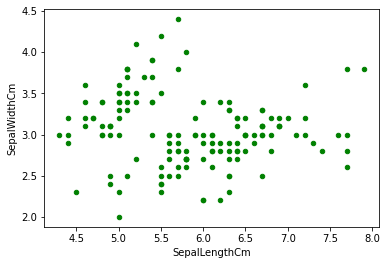

In [6]:
#Visualizing Sepal length data using matplotlib
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm", c = "green")
plt.show()

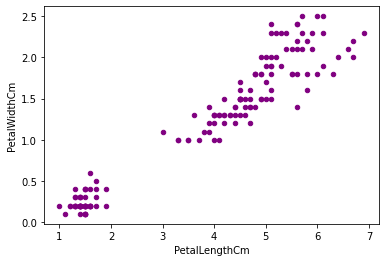

In [7]:
#Visualizing Petal length data using matplotlib
iris.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm", c = "purple")
plt.show()

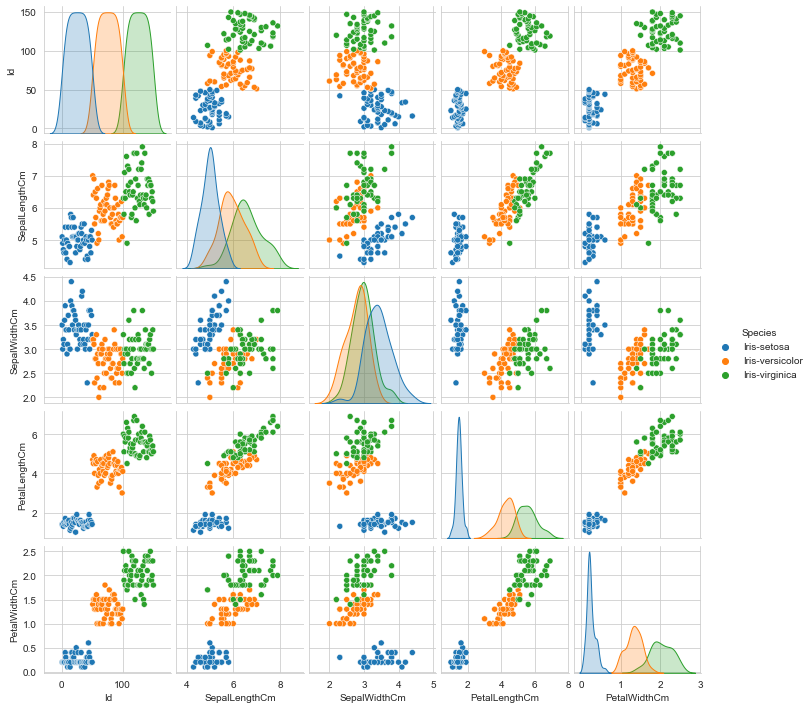

In [8]:
#Using pairplot for better visualization of the dataset
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Species",height=2);
plt.show()

## **K-Means**<br>
### **K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.**

In [9]:
#Finding Optimum number of clusters for k-means classification
x = iris.iloc[:, [1, 2, 3, 4]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## **Elbow Method**<br>
### **It is an empirical method to find out the best value of k.It picks up the range of values and takes the best among them.It calculates the sum of the square of the points and calculates the average distance.**

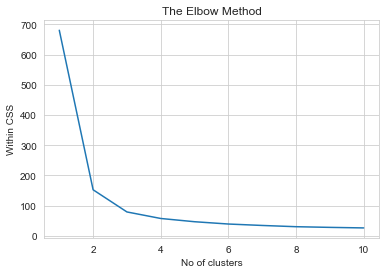

In [10]:
#Plotting the results onto a line graph, allowing us to observe 'The Elbow Method'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('Within CSS') #within cluster sum of squares
plt.show()

In [11]:
#Creating the kmeans classifier
kmean = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmean = kmean.fit_predict(x)

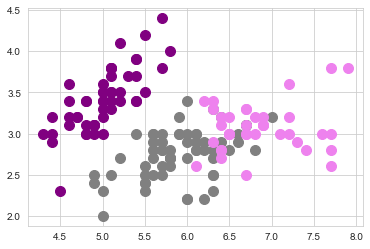

In [15]:
#Plotting the clusters
plt.scatter(x[y_kmean == 0, 0], x[y_kmean == 0, 1], s = 100, c = 'grey', label = 'Iris-Setosa')
plt.scatter(x[y_kmean == 1, 0], x[y_kmean == 1, 1], s = 100, c = 'purple', label = 'Iris-Versicolour')
plt.scatter(x[y_kmean == 2, 0], x[y_kmean == 2, 1], s = 100, c = 'violet', label = 'Iris-Virginica')

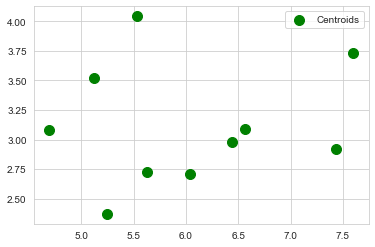

In [13]:
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')
plt.legend()

## **Now Combine the graphs to show the cluster plot**

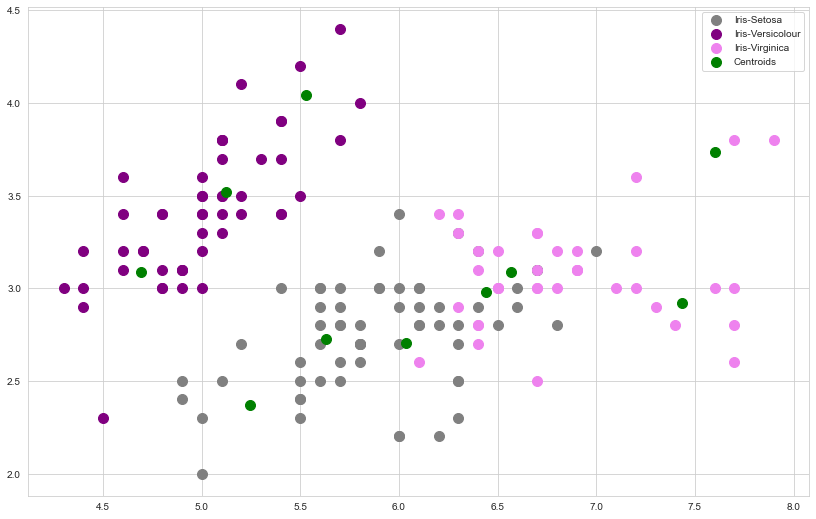

In [14]:
#Visualising the clusters
plt.figure(figsize = (14,9))
plt.scatter(x[y_kmean == 0, 0], x[y_kmean == 0, 1], s = 100, c = 'grey', label = 'Iris-Setosa')
plt.scatter(x[y_kmean == 1, 0], x[y_kmean == 1, 1], s = 100, c = 'purple', label = 'Iris-Versicolour')
plt.scatter(x[y_kmean == 2, 0], x[y_kmean == 2, 1], s = 100, c = 'violet', label = 'Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids')

plt.legend()

## **Thank You**